# Attention-CLX-stock-prediction
### Dataset: Chinese Stocks

### 1. Importing Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn import metrics
from utils import *

In [2]:
data = pd.read_csv('601988.SH.csv')
test_set2 = data.loc[3501:, :] 
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,turnover_rate,volume_ratio,pe,pb,ps,total_share,float_share,free_share,total_mv,circ_mv
0,601988.SH,20070104,5.69,5.97,5.37,5.63,5.43,0.20,3.6800,7281333.33,...,16.8115,1.67,34.1143,3.7772,9.8280,2.538392e+07,4.331171e+05,3.454547e+05,1.429114e+08,2.438449e+06
1,601988.SH,20070105,5.30,5.34,5.07,5.07,5.63,-0.56,-9.9500,7867306.84,...,15.1068,1.60,30.7210,3.4015,8.8504,2.538392e+07,5.207794e+05,3.454547e+05,1.286965e+08,2.640352e+06
2,601988.SH,20070108,4.87,5.14,4.83,5.08,5.07,0.01,0.2000,5565756.49,...,10.6874,0.97,30.7816,3.4082,8.8679,2.538392e+07,5.207794e+05,3.454547e+05,1.289503e+08,2.645559e+06
3,601988.SH,20070109,5.06,5.19,4.95,5.18,5.08,0.10,1.9700,4334458.33,...,8.3230,0.68,31.3875,3.4753,9.0424,2.538392e+07,5.207794e+05,3.454547e+05,1.314887e+08,2.697637e+06
4,601988.SH,20070110,5.25,5.29,5.05,5.10,5.18,-0.08,-1.5400,3721171.25,...,7.1454,0.59,30.9028,3.4217,8.9028,2.538392e+07,5.207794e+05,3.454547e+05,1.294580e+08,2.655975e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,601988.SH,20220311,3.08,3.11,3.06,3.10,3.08,0.02,0.6494,1789426.50,...,0.0849,1.09,4.7317,0.4904,1.6137,2.943878e+07,2.107655e+07,2.049396e+06,9.126022e+07,6.533731e+07
3677,601988.SH,20220314,3.08,3.12,3.07,3.09,3.10,-0.01,-0.3226,1576585.15,...,0.0748,0.94,4.7164,0.4888,1.6085,2.943878e+07,2.107655e+07,2.049396e+06,9.096583e+07,6.512654e+07
3678,601988.SH,20220315,3.09,3.09,3.02,3.03,3.09,-0.06,-1.9417,2902299.85,...,0.1377,1.68,4.6249,0.4793,1.5773,2.943878e+07,2.107655e+07,2.049396e+06,8.919950e+07,6.386195e+07
3679,601988.SH,20220316,3.04,3.08,3.02,3.07,3.03,0.04,1.3201,2194095.53,...,0.1041,1.09,4.6859,0.4856,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07


In [3]:
data.index = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data = data.drop(['ts_code', 'trade_date'], axis=1)
data = pd.DataFrame(data, dtype=np.float64)
data

,open,high,low,close,pre_close,change,pct_chg,vol,amount,turnover_rate,volume_ratio,pe,pb,ps,total_share,float_share,free_share,total_mv,circ_mv
trade_date,,,,,,,,,,,,,,,,,,,
2007-01-04,5.69,5.97,5.37,5.63,5.43,0.20,3.6800,7281333.33,4224852.614,16.8115,1.67,34.1143,3.7772,9.8280,2.538392e+07,4.331171e+05,3.454547e+05,1.429114e+08,2.438449e+06
2007-01-05,5.30,5.34,5.07,5.07,5.63,-0.56,-9.9500,7867306.84,4050377.943,15.1068,1.60,30.7210,3.4015,8.8504,2.538392e+07,5.207794e+05,3.454547e+05,1.286965e+08,2.640352e+06
2007-01-08,4.87,5.14,4.83,5.08,5.07,0.01,0.2000,5565756.49,2763751.983,10.6874,0.97,30.7816,3.4082,8.8679,2.538392e+07,5.207794e+05,3.454547e+05,1.289503e+08,2.645559e+06
2007-01-09,5.06,5.19,4.95,5.18,5.08,0.10,1.9700,4334458.33,2198327.249,8.3230,0.68,31.3875,3.4753,9.0424,2.538392e+07,5.207794e+05,3.454547e+05,1.314887e+08,2.697637e+06
2007-01-10,5.25,5.29,5.05,5.10,5.18,-0.08,-1.5400,3721171.25,1915221.182,7.1454,0.59,30.9028,3.4217,8.9028,2.538392e+07,5.207794e+05,3.454547e+05,1.294580e+08,2.655975e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-11,3.08,3.11,3.06,3.10,3.08,0.02,0.6494,1789426.50,550569.534,0.0849,1.09,4.7317,0.4904,1.6137,2.943878e+07,2.107655e+07,2.049396e+06,9.126022e+07,6.533731e+07
2022-03-14,3.08,3.12,3.07,3.09,3.10,-0.01,-0.3226,1576585.15,489277.432,0.0748,0.94,4.7164,0.4888,1.6085,2.943878e+07,2.107655e+07,2.049396e+06,9.096583e+07,6.512654e+07
2022-03-15,3.09,3.09,3.02,3.03,3.09,-0.06,-1.9417,2902299.85,886628.898,0.1377,1.68,4.6249,0.4793,1.5773,2.943878e+07,2.107655e+07,2.049396e+06,8.919950e+07,6.386195e+07


In [4]:
training_set = data.loc['2007-01-04':'2021-06-21', :]
test_set = data.loc['2021-06-22':, :]
#test_set2 = data.loc[3501:, :]

C:\Users\sawan\anaconda3\envs\lstm_x\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


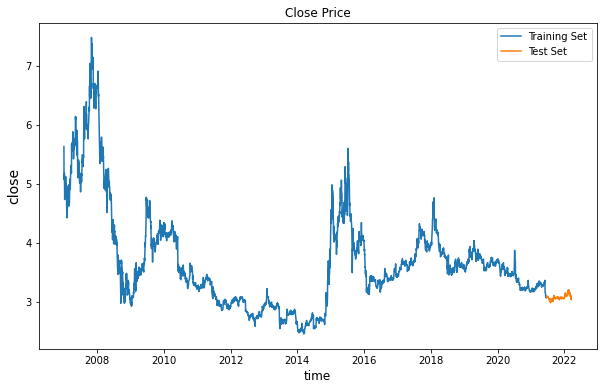

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(training_set['close'], label='Training Set')
plt.plot(test_set['close'], label='Test Set')
plt.title('Close Price')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()


C:\Users\sawan\anaconda3\envs\lstm_x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


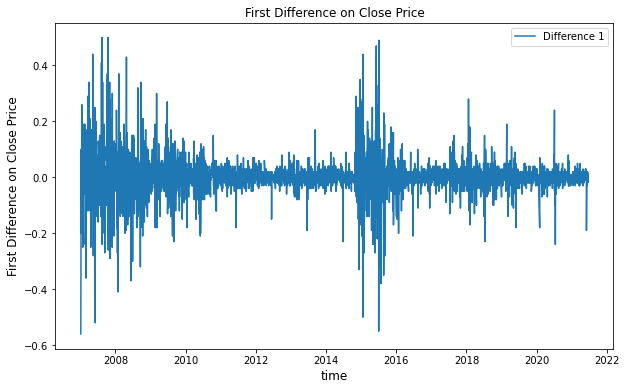

In [6]:
temp = np.array(training_set['close'])

training_set['diff1'] = training_set['close'].diff(1)
plt.figure(figsize=(10, 6))
plt.plot(training_set['diff1'], label='Difference 1')
plt.title('First Difference on Close Price')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('First Difference on Close Price', fontsize= 12, horizontalalignment='center')
plt.legend()
plt.show()

C:\Users\sawan\anaconda3\envs\lstm_x\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


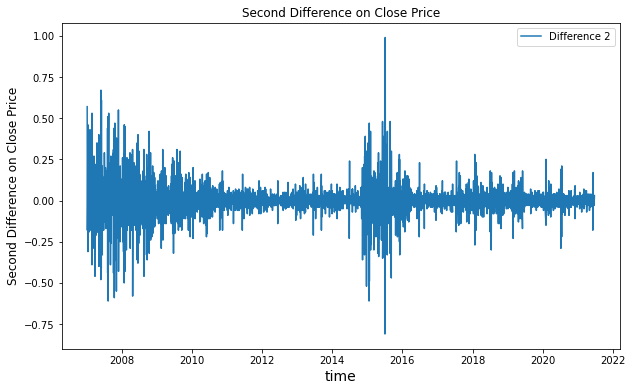

In [7]:
training_set['diff2'] = training_set['diff1'].diff(1)
plt.figure(figsize=(10, 6))
plt.plot(training_set['diff2'], label='Difference 2')
plt.title('Second Difference on Close Price')
plt.xlabel('time', fontsize=14, verticalalignment='top')
plt.ylabel('Second Difference on Close Price', fontsize= 12, horizontalalignment='center')
plt.legend()
plt.show()

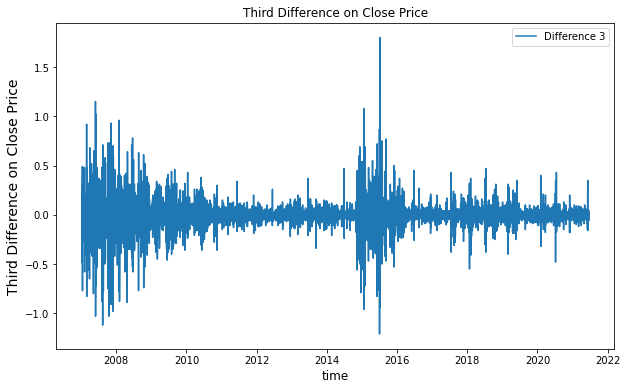

In [8]:
training_set_ruf = training_set.copy()
training_set_ruf['diff3'] = training_set['diff2'].diff(1)
plt.figure(figsize=(10, 6))
plt.plot(training_set_ruf['diff3'], label='Difference 3')
plt.title('Third Difference on Close Price')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('Third Difference on Close Price', fontsize= 14, horizontalalignment='center')
plt.legend()
plt.show()

In [9]:
# White Noise Test
training_data1 = training_set['diff1']
temp1 = np.diff(training_set['close'], n=1)
acorr_ljungbox(temp1, lags=2, boxpierce=True)

(array([ 3.45834564, 23.69532318]),
 array([6.29332516e-02, 7.15526869e-06]),
 array([ 3.45538304, 23.66924582]),
 array([6.30461256e-02, 7.24917486e-06]))

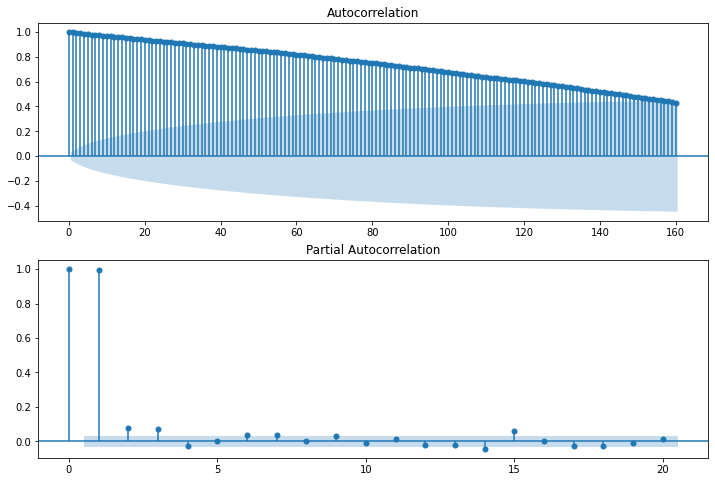

In [10]:
acf_pacf_plot(training_set['close'],acf_lags=160)

In [11]:
price = list(temp1)
price
data2 = {
    'trade_date':training_set['diff1'].index[1:],
    'close': price
}
df = pd.DataFrame(data2)
df
#df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
#print(df)

,trade_date,close
0,2007-01-05,-0.56
1,2007-01-08,0.01
2,2007-01-09,0.10
3,2007-01-10,-0.08
4,2007-01-11,-0.17
...,...,...
3495,2021-06-15,-0.01
3496,2021-06-16,0.02
3497,2021-06-17,-0.01
3498,2021-06-18,-0.02


In [12]:
training_data_diff = df.set_index(['trade_date'])
print(training_data_diff)

            close
trade_date       
2007-01-05  -0.56
2007-01-08   0.01
2007-01-09   0.10
2007-01-10  -0.08
2007-01-11  -0.17
...           ...
2021-06-15  -0.01
2021-06-16   0.02
2021-06-17  -0.01
2021-06-18  -0.02
2021-06-21   0.01

[3500 rows x 1 columns]


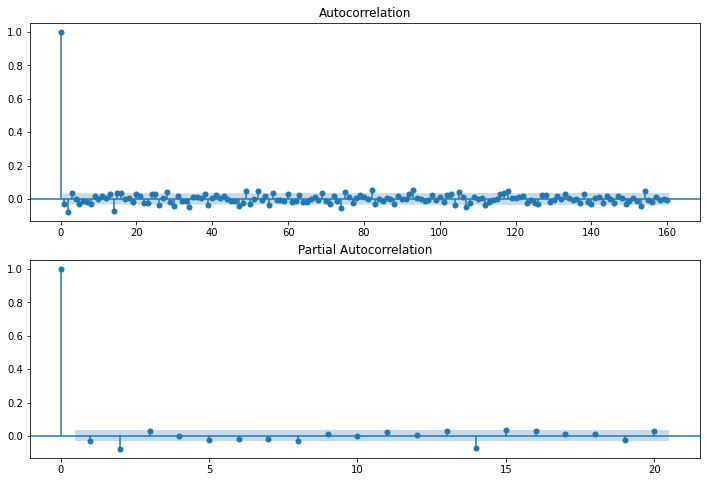

In [13]:
acf_pacf_plot(training_data_diff, acf_lags=160)

In [14]:
test_set2

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,turnover_rate,volume_ratio,pe,pb,ps,total_share,float_share,free_share,total_mv,circ_mv
3501,601988.SH,20210622,3.07,3.08,3.06,3.07,3.07,0.00,0.0000,930629.26,...,0.0442,0.61,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07
3502,601988.SH,20210623,3.07,3.08,3.06,3.07,3.07,0.00,0.0000,875408.11,...,0.0415,0.64,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07
3503,601988.SH,20210624,3.07,3.08,3.06,3.07,3.07,0.00,0.0000,823244.26,...,0.0391,0.69,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07
3504,601988.SH,20210625,3.08,3.10,3.07,3.09,3.07,0.02,0.6515,1265417.16,...,0.0600,1.16,4.7164,0.5192,1.6085,2.943878e+07,2.107655e+07,2.049396e+06,9.096583e+07,6.512654e+07
3505,601988.SH,20210628,3.09,3.10,3.08,3.08,3.09,-0.01,-0.3236,967219.17,...,0.0459,0.95,4.7012,0.5175,1.6033,2.943878e+07,2.107655e+07,2.049396e+06,9.067144e+07,6.491578e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,601988.SH,20220311,3.08,3.11,3.06,3.10,3.08,0.02,0.6494,1789426.50,...,0.0849,1.09,4.7317,0.4904,1.6137,2.943878e+07,2.107655e+07,2.049396e+06,9.126022e+07,6.533731e+07
3677,601988.SH,20220314,3.08,3.12,3.07,3.09,3.10,-0.01,-0.3226,1576585.15,...,0.0748,0.94,4.7164,0.4888,1.6085,2.943878e+07,2.107655e+07,2.049396e+06,9.096583e+07,6.512654e+07
3678,601988.SH,20220315,3.09,3.09,3.02,3.03,3.09,-0.06,-1.9417,2902299.85,...,0.1377,1.68,4.6249,0.4793,1.5773,2.943878e+07,2.107655e+07,2.049396e+06,8.919950e+07,6.386195e+07
3679,601988.SH,20220316,3.04,3.08,3.02,3.07,3.03,0.04,1.3201,2194095.53,...,0.1041,1.09,4.6859,0.4856,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07


In [15]:
model = sm.tsa.ARIMA(endog=training_set['close'], order=(2, 1, 0)).fit()
history = [x for x in training_set['close']]
predictions = []

for i in range(test_set.shape[0]):
    model1 = sm.tsa.ARIMA(history, order=(2,1,0))
    model_fit = model1.fit()
    yhat = model_fit.forecast()
    print(yhat)
    yhat = np.float(yhat[0])
    predictions.append(yhat)
    obs = test_set2.iloc[i, 5]
    history.append(obs)


C:\Users\sawan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sawan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(array([3.070427]), array([0.07178226]), array([[2.92973635, 3.21111765]]))
(array([3.06842006]), array([0.07177201]), array([[2.9277495 , 3.20909061]]))
(array([3.06920425]), array([0.07176177]), array([[2.92855377, 3.20985473]]))
(array([3.06920448]), array([0.07175152]), array([[2.92857408, 3.20983488]]))
(array([3.08852159]), array([0.07174215]), array([[2.94790957, 3.22913361]]))
(array([3.07798502]), array([0.07173205]), array([[2.93739278, 3.21857727]]))
(array([3.07999227]), array([0.07172183]), array([[2.93942006, 3.22056447]]))
(array([3.07920856]), array([0.07171161]), array([[2.93865639, 3.21976072]]))
(array([3.07920878]), array([0.07170139]), array([[2.93867665, 3.21974092]]))
(array([3.07920901]), array([0.07169117]), array([[2.9386969 , 3.21972112]]))
(array([3.07920923]), array([0.07168096]), array([[2.93871714, 3.21970133]]))
(array([3.08886779]), array([0.07167098]), array([[2.94839525, 3.22934033]]))
(array([3.07877063]), array([0.07166093]), array([[2.93831779, 3.2

(array([3.07844826]), array([0.07075944]), array([[2.9397623 , 3.21713422]]))
(array([3.06957517]), array([0.07074977]), array([[2.93090816, 3.20824218]]))
(array([3.06035427]), array([0.07074015]), array([[2.92170613, 3.19900241]]))
(array([3.0503513]), array([0.07073056]), array([[2.91172196, 3.18898064]]))
(array([3.05965918]), array([0.07072094]), array([[2.92104868, 3.19826968]]))
(array([3.04878789]), array([0.07071133]), array([[2.91019623, 3.18737955]]))
(array([3.05965939]), array([0.07070179]), array([[2.92108643, 3.19823234]]))
(array([3.05844365]), array([0.070692]), array([[2.91988987, 3.19699743]]))
(array([3.068881]), array([0.07068248]), array([[2.93034588, 3.20741612]]))
(array([3.05879205]), array([0.07067286]), array([[2.92027579, 3.19730832]]))
(array([3.06966309]), array([0.07066333]), array([[2.9311655 , 3.20816068]]))
(array([3.06844771]), array([0.07065357]), array([[2.92996927, 3.20692616]]))
(array([3.0595746]), array([0.07064394]), array([[2.92111502, 3.19803

In [16]:
predictions

[3.0704269966660602,
 3.068420058023698,
 3.0692042505766115,
 3.069204480351994,
 3.0885215906138415,
 3.0779850239366837,
 3.079992266306162,
 3.0792085590951945,
 3.079208782122006,
 3.0792090067481044,
 3.079209232016687,
 3.0888677892075442,
 3.0787706343115286,
 3.0703355660914458,
 3.069990945996989,
 3.0595488724219178,
 3.050329810073952,
 3.0306681923569565,
 3.0404213425249638,
 3.0480730579296047,
 3.0387595844377953,
 3.0399830779665042,
 3.0391992853328547,
 3.048857876940798,
 3.03876055907537,
 3.049642180967389,
 3.0387612349680824,
 3.039984316283342,
 3.019884261245565,
 2.991786617676131,
 3.0108537542245526,
 2.988308577449721,
 2.9810952462747267,
 2.989624739606996,
 2.988402387531821,
 3.0181605867809633,
 3.016845156859808,
 3.0385125832771966,
 3.018320608410594,
 3.0304209117534864,
 3.0284170740567995,
 3.009884987738198,
 3.039733097585894,
 3.0175407066289397,
 3.0207639876052483,
 3.0288552199440466,
 3.018761431639133,
 3.019981736933326,
 3.009541875596

In [17]:
predictions1 = {
    'trade_date': test_set.index[:],
    'close': predictions
}
predictions1 = pd.DataFrame(predictions1)
predictions1 = predictions1.set_index(['trade_date'], drop = True)
#predictions1.to_csv('ARIMA.csv')
predictions1

,close
trade_date,
2021-06-22,3.070427
2021-06-23,3.068420
2021-06-24,3.069204
2021-06-25,3.069204
2021-06-28,3.088522
...,...
2022-03-11,3.080804
2022-03-14,3.098557
2022-03-15,3.088036


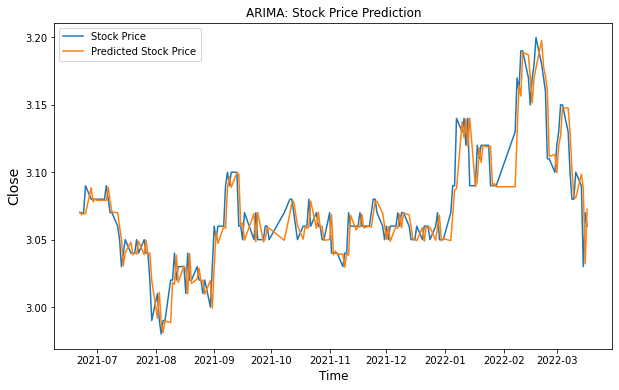

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(test_set['close'], label='Stock Price')
plt.plot(predictions1, label='Predicted Stock Price')
plt.title('ARIMA: Stock Price Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

C:\Users\sawan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sawan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


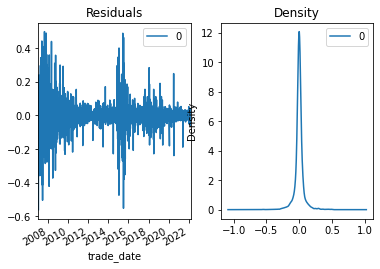

MSE: 0.00027
RMSE: 0.01652
MAE: 0.01201
R2: 0.84402
                                value
Test Statistic Value         -2.35539
p-value                      0.154726
Lags Used                          16
Number of Observations Used      3484
Critical Value(1%)           -3.43223
Critical Value(5%)           -2.86237
Critical Value(10%)          -2.56721
                                   value
Test Statistic Value            -14.7498
p-value                      2.49565e-27
Lags Used                             15
Number of Observations Used         3484
Critical Value(1%)              -3.43223
Critical Value(5%)              -2.86237
Critical Value(10%)             -2.56721


In [19]:
model2 = sm.tsa.ARIMA(endog=data['close'], order=(2, 1, 0)).fit()
residuals = pd.DataFrame(model2.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
residuals.to_csv('./ARIMA_residuals1.csv')
evaluation_metric(test_set['close'],predictions)
adf_test(temp)
adf_test(temp1)

# trade_date
2021-05-21   -0.000357
2021-05-24   -0.001580
2021-05-25   -0.001140
2021-05-26   -0.002613
2021-05-27   -0.003147
2021-05-28   -0.000452
2021-05-31   -0.001046
2021-06-01   -0.002803
2021-06-02   -0.000357
2021-06-03   -0.002269
2021-06-04   -0.002019
2021-06-07    0.006532
2021-06-08    0.014784
2021-06-09    0.001116
2021-06-10   -0.000012
2021-06-11    0.000237
2021-06-15    0.002244
2021-06-16    0.001116
2021-06-17   -0.000701
2021-06-18   -0.002019
2021-06-21    0.000677
dtype: float64


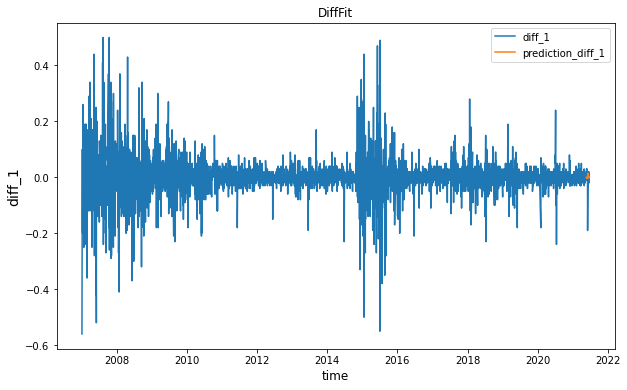

In [20]:
predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
predictions_ARIMA_diff = predictions_ARIMA_diff[3479:]
print('#', predictions_ARIMA_diff)
plt.figure(figsize=(10, 6))
plt.plot(training_data_diff, label="diff_1")
plt.plot(predictions_ARIMA_diff, label="prediction_diff_1")
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('diff_1', fontsize=14, horizontalalignment='center')
plt.title('DiffFit')
plt.legend()
plt.show()

## 2. LSTM Model

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: initialization failed